In [30]:
import sqlite3
import pandas as pd
con = sqlite3.connect("Chinook_Sqlite.sqlite")
c = con.cursor()
q = "SELECT name FROM  sqlite_master WHERE type ='table' AND name NOT LIKE 'sqlite_%';"
c.execute(q)
print(c.fetchall())

# Digital Media Store Chinook Database - consisting of artists, albums, tracks, genres and playlists

#import selected tables to dataframe

q = '''SELECT Track.TrackId, Track.AlbumId, Artist.ArtistId, Genre.Name AS GenreName, Playlist.Name AS PlaylistName, Playlist.PlaylistId, Artist.Name As ArtistName, Track.Name AS TrackName, Album.Title
       FROM Track 
       INNER JOIN Album ON Album.AlbumId = Track.AlbumId 
       INNER JOIN Artist ON Artist.ArtistId = Album.ArtistId
       INNER JOIN Genre ON Genre.GenreId = Track.GenreId
       INNER JOIN PlaylistTrack ON PlaylistTrack.TrackId = Track.TrackId
       INNER JOIN Playlist on Playlist.PlaylistId = PlaylistTrack.PlaylistId;'''
c.execute(q)
#print(c.fetchall())

datafr = pd.read_sql(q, con = con)
print(datafr)

uniqueAlbums = datafr.drop_duplicates(subset="AlbumId")
#print(uniqueAlbums)  
vc = uniqueAlbums.ArtistName.value_counts() > 1
vc = vc[vc]
df = uniqueAlbums.loc[uniqueAlbums.ArtistName.isin(vc.index)]    #artists with more than one album
print('Artists with more than one album')
print(df)

x = datafr['GenreName'].value_counts().nlargest(7)
print(x)
genre_list = ['Rock', 'Latin', 'Metal', 'Alternative & Punk', 'Classical', 'Jazz' 'Blues']
newdf = df[df['GenreName'].isin(genre_list)]

dictlist = []
a = df['ArtistName'].unique() 
print('Artist list:', a)

for i in a: 
    smalldf = newdf[newdf['ArtistName'] == i]
    gc = smalldf['GenreName'].value_counts()
    a_dict = gc.to_dict()
    
    for g in genre_list:
        if g not in a_dict:
            a_dict[g] = 0
    
    x_df = datafr.drop_duplicates(subset='TrackId')     #drop duplicates
    xdf = x_df[x_df['ArtistName'] == i]
    y_df = datafr.drop_duplicates(subset='PlaylistId')  #drop duplicates
    ydf = y_df[y_df['ArtistName'] == i]
    
    trackc = len(xdf)
    albumc = len(smalldf)
    playlistc = len(ydf)
    
    a_dict['Artist'] = i
    a_dict['num_tracks'] = trackc
    a_dict['num_albums'] = albumc
    a_dict['num_playlists'] = playlistc
    dictlist.append(a_dict)


tmpdf = pd.DataFrame(dictlist) 
mydf = tmpdf[['Artist', 'Rock', 'Latin', 'Metal', 'Alternative & Punk', 
              'Classical', 'Jazz' 'Blues', 'num_albums', 
              'num_tracks', 'num_playlists']]
print(mydf)

[('Album',), ('Artist',), ('Customer',), ('Employee',), ('Genre',), ('Invoice',), ('InvoiceLine',), ('MediaType',), ('Playlist',), ('PlaylistTrack',), ('Track',)]
      TrackId  AlbumId  ArtistId    GenreName         PlaylistName  \
0        3402      271         8  Alternative                Music   
1        3389      271         8  Alternative                Music   
2        3390      271         8  Alternative                Music   
3        3391      271         8  Alternative                Music   
4        3392      271         8  Alternative                Music   
...       ...      ...       ...          ...                  ...   
8710     2094      171       114         Rock  Heavy Metal Classic   
8711     2095      171       114         Rock  Heavy Metal Classic   
8712     2096      172       114         Rock  Heavy Metal Classic   
8713     3290      257       179         Rock  Heavy Metal Classic   
8714      597       48        68         Jazz          On-The-Go 1 

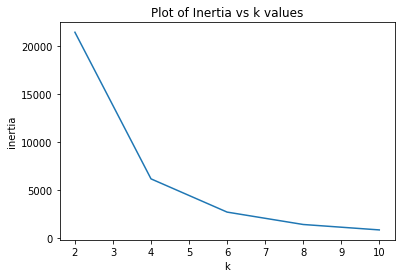

{2: 21432.613333333335, 4: 6134.424302134648, 6: 2667.369642857143, 8: 1374.2244355317885, 10: 808.0060606060606}


In [6]:
import matplotlib.pyplot as plt
import sklearn
from sklearn import cluster
import numpy as np

#class label
classlabel = ['Artist']
select = [j for j in mydf.columns if j not in classlabel]
df_km = mydf.loc[:, select]      
#df without the artist names

klist = [2,4,6,8,10]
inerlist = []

for k in klist: 
    km = sklearn.cluster.KMeans(n_clusters = k).fit(df_km)
    
    # Get cluster assignment labels
    labels = km.labels_
    
    #Get inertia
    intertia = km.inertia_
    inerlist.append(intertia)

#plot of inertia vs. k values
fig, ax = plt.subplots()
plt.plot(klist, inerlist)
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Plot of Inertia vs k values')
plt.show()

kdict = {k:v for k, v in zip(klist, inerlist)}
print(kdict)



In [105]:
# DESCRIPTION: 
# The inertia is the sum of squared distances of samples to their closest cluster center.
# The intertia vs k graph gives shows that after a certain number of clusters (k-values), 
# the changes in total distance becomes insignificant compared to previous changes. 
# Therefore, we do not need to go beyond this point of k-value
# This k-value gives us the elbow point.
    
# DISCUSSION:  
# Based on the above plot, after k = 4 , we observe that the slope decreases. 
# Taking clusters k > 4 will not be useful for our clustering algorithm.
# Best k value --> most optimal number of clusters --> k = 4

In [58]:
k_list = [1,2,3,4]
kval = 4
km = sklearn.cluster.KMeans(n_clusters = kval).fit(df_km)   
labels = km.labels_

dfkm_matrix = df_km.values #converting to matrix
a_cluster1 = [] #artists in the cluster
a_cluster2 = [] #artists in the cluster
a_cluster3 = [] #artists in the cluster
a_cluster4 = [] #artists in the cluster

print('Clusters with the indices and points closest to centroid, along with the artist names for each cluster')
for j in k_list:
    dist = km.transform(df_km)[:, j-1]
    indices = np.argsort(dist)[::][:3]  #closest 3 indices to the cluster centroid
    points = dfkm_matrix[indices]    #points closest to the cluster centroid
    print('Cluster', {j}, indices)
    print(points)
    
    for i in indices:
        print(a[i])  #artists from the artist list a 
        
        if j == 1:
            a_cluster1.append(a[i])
        elif j == 2:
            a_cluster2.append(a[i])
        elif j == 3:
            a_cluster3.append(a[i])
        elif j == 4:
            a_cluster4.append(a[i])
        

Clusters with the indices and points closest to centroid, along with the artist names for each cluster
Cluster {1} [51 22 21]
[[ 2  0  0  0  0  0  2 23  0]
 [ 0  2  0  0  0  0  2 21  0]
 [ 0  0  0  0  0  0  0 21  0]]
Skank
Caetano Veloso
Spyro Gyra
Cluster {2} [46 35 44]
[[ 14   0   0   0   0   0  14 114   0]
 [  0   0  10   0   0   0  10 112   0]
 [ 11   0   0   0   0   0  11  92   0]]
Led Zeppelin
Metallica
Deep Purple
Cluster {3} [12 37 46]
[[  7   0  10   0   0   0  17 213   0]
 [  9   0   0   0   0   0   9 135   0]
 [ 14   0   0   0   0   0  14 114   0]]
Iron Maiden
U2
Led Zeppelin
Cluster {4} [48  2 34]
[[ 3  0  0  0  0  0  3 45  0]
 [ 3  0  0  1  0  0  4 44  0]
 [ 2  0  1  0  0  0  3 42  0]]
Queen
Foo Fighters
Guns N' Roses


In [59]:
#to order the dictionary
desired_order = ['Artist', 'Rock', 'Latin', 'Metal', 'Alternative & Punk', 
              'Classical', 'Jazz' 'Blues', 'num_albums', 
              'num_tracks', 'num_playlists']
for key in desired_order:
    for elem in dictlist:
        elem = {k: elem[k] for k in desired_order}

#artists and features
print('Artists in cluster 1 along with their features')
print(a_cluster1) #artists in the cluster 1
for artist in a_cluster1:
    info = next(item for item in dictlist if item['Artist'] == artist)
    print(info)

    
print('Artists in cluster 2 along with their features')
print(a_cluster2) #artists in the cluster 2
for artist in a_cluster2:
    info = next(item for item in dictlist if item['Artist'] == artist)
    print(info)
    
    
print('Artists in cluster 3 along with their features')
print(a_cluster3) #artists in the cluster 3
for artist in a_cluster3:
    info = next(item for item in dictlist if item['Artist'] == artist)
    print(info)
 

print('Artists in cluster 4 along with their features')
print(a_cluster4) #artists in the cluster 4
for artist in a_cluster4:
    info = next(item for item in dictlist if item['Artist'] == artist)
    print(info)

Artists in cluster 1 along with their features
['Skank', 'Caetano Veloso', 'Spyro Gyra']
{'Artist': 'Skank', 'Rock': 2, 'Latin': 0, 'Metal': 0, 'Alternative & Punk': 0, 'Classical': 0, 'JazzBlues': 0, 'num_albums': 2, 'num_tracks': 23, 'num_playlists': 0}
{'Artist': 'Caetano Veloso', 'Rock': 0, 'Latin': 2, 'Metal': 0, 'Alternative & Punk': 0, 'Classical': 0, 'JazzBlues': 0, 'num_albums': 2, 'num_tracks': 21, 'num_playlists': 0}
{'Artist': 'Spyro Gyra', 'Rock': 0, 'Latin': 0, 'Metal': 0, 'Alternative & Punk': 0, 'Classical': 0, 'JazzBlues': 0, 'num_albums': 0, 'num_tracks': 21, 'num_playlists': 0}
Artists in cluster 2 along with their features
['Led Zeppelin', 'Metallica', 'Deep Purple']
{'Artist': 'Led Zeppelin', 'Rock': 14, 'Latin': 0, 'Metal': 0, 'Alternative & Punk': 0, 'Classical': 0, 'JazzBlues': 0, 'num_albums': 14, 'num_tracks': 114, 'num_playlists': 0}
{'Artist': 'Metallica', 'Rock': 0, 'Latin': 0, 'Metal': 10, 'Alternative & Punk': 0, 'Classical': 0, 'JazzBlues': 0, 'num_album